In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Let's know about our dataset before proceeding further

We arwe having total 23 columns in our dsataset, let us know about them first

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


With the above we can see first 5 rows of our dataset, by which we can see that which factors are affecting that whether there will be rain or not or also amount of rain.

In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


With the above we can see last 5 rows of our dataset, by which we can see that some pof columns are having null values in top and bottom rows which we have to deal with and we'll do it further.

In [5]:
df.shape

(8425, 23)

By the above function we can see that we are having 8425 rows and 23 columns in our dataset.

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [90]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Here we can see that most of our columns are having float datatype which can work with machine learning model however we need t deal with date column as it is showing object datatype and we need to change it to date data type also we'll treat object datatypes columns.

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [4]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [5]:
#Now let's change our object columns into nuymeric to proceed further.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [6]:
df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df['Location'] = label_encoder.fit_transform(df['Location'])

Great! now we have all the columns ready to work with by which we can proceed further for analysis and model.

In [7]:
#let's quickly check null values now as we have seen many in tail function.
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Let's fill median of each column in place of null values.

In [8]:
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].median(), inplace=True)
df['MinTemp'].fillna(df['MinTemp'].median(), inplace=True)

In [9]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [12]:
df['RainToday'].fillna(df['RainToday'].median(), inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].median(), inplace=True)

In [13]:
df['RainToday'] = df['RainToday'].round().astype(int)
df['RainTomorrow'] = df['RainTomorrow'].round().astype(int)

In [14]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,4.6,8.7,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.1,0.0,4.6,8.7,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.7,0.0,4.6,8.7,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.0,0.0,4.6,8.7,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.3,1.0,4.6,8.7,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [15]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

And it's done we've succesfully treated all the null values in one go.

<Axes: >

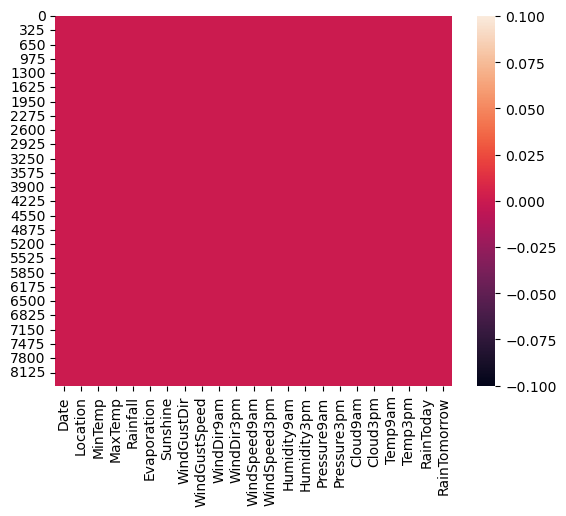

In [19]:
#let's also check heatmap of null values after treatment
sns.heatmap(df.isnull())

We can see that our graph is having maximum colour near to 0 this means we do not have any null value in our dataset, and it's ready to work with after checking outliers.

In [20]:
df.nunique().to_frame("Unique values")

,Unique values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,17
WindGustSpeed,52
WindDir9am,17


We can see we are having maximum unique values in numeric column which will be helpful in analysing data.

In [21]:
df.duplicated().sum()

1663

We can see we are having some duplicate rows and and as we are having large data it is better to drop this rows.

In [16]:
df.drop_duplicates(inplace=True)  

And it's done, now we can proceed further by analysing our data closely.

In [23]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.00000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,...,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.00000,6762.000000,6762.000000
mean,5.323721,13.111121,24.091615,2.723410,4.99898,8.278098,8.839397,38.980775,8.539781,8.147146,...,67.510500,50.474712,1017.640565,1015.154836,4.519817,4.511979,17.894321,22.69756,0.273292,0.273292
std,3.099455,5.540700,6.130557,10.490138,3.36177,2.763362,5.349625,13.376460,5.096202,4.782762,...,17.182756,18.498449,6.027984,5.968063,2.492344,2.343253,5.722417,5.97258,0.489342,0.489342
min,0.000000,-2.000000,8.200000,0.000000,0.00000,0.000000,0.000000,7.000000,0.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.30000,0.000000,0.000000
25%,2.250000,9.000000,19.600000,0.000000,4.00000,8.700000,4.000000,30.000000,4.000000,4.000000,...,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.40000,0.000000,0.000000
50%,6.000000,13.200000,23.400000,0.000000,4.60000,8.700000,9.000000,39.000000,9.000000,9.000000,...,68.000000,50.000000,1017.700000,1015.300000,5.000000,5.000000,17.900000,22.00000,0.000000,0.000000
75%,8.000000,17.400000,28.400000,0.800000,5.00000,9.200000,14.000000,46.000000,13.000000,12.000000,...,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.80000,1.000000,1.000000
max,11.000000,28.500000,45.500000,371.000000,145.00000,13.900000,16.000000,107.000000,16.000000,16.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.10000,2.000000,2.000000


In [24]:
    df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.090489,0.070721,-0.004972,0.134965,0.067920,0.011405,0.260084,-0.113824,0.006754,...,-0.033586,-0.001386,-0.036859,-0.022566,-0.017268,-0.021092,0.098494,0.065902,0.018993,0.018408
MinTemp,0.090489,1.000000,0.728026,0.091021,0.284674,0.012003,-0.141446,0.242730,-0.143811,-0.151578,...,-0.154194,0.067616,-0.441599,-0.441167,0.073219,0.022241,0.891383,0.696957,0.087215,0.107585
MaxTemp,0.070721,0.728026,1.000000,-0.087556,0.356440,0.333129,-0.211163,0.165505,-0.247544,-0.176146,...,-0.425145,-0.430850,-0.338016,-0.413595,-0.247758,-0.246783,0.866664,0.975059,-0.193289,-0.132538
Rainfall,-0.004972,0.091021,-0.087556,1.000000,-0.003746,-0.191051,0.056211,0.088131,0.068853,0.033549,...,0.227943,0.242929,-0.071052,-0.032647,0.184536,0.151333,-0.004344,-0.091744,0.377023,0.185352
Evaporation,0.134965,0.284674,0.356440,-0.003746,1.000000,0.256665,-0.098705,0.176630,-0.093154,-0.045098,...,-0.269767,-0.195450,-0.202765,-0.218394,-0.093375,-0.135537,0.338000,0.347993,-0.112227,-0.075301
Sunshine,0.067920,0.012003,0.333129,-0.191051,0.256665,1.000000,-0.047481,-0.010376,-0.052224,-0.037696,...,-0.342230,-0.434482,0.002679,-0.051643,-0.504885,-0.530041,0.199733,0.353486,-0.242149,-0.324676
WindGustDir,0.011405,-0.141446,-0.211163,0.056211,-0.098705,-0.047481,1.000000,0.010128,0.404985,0.508731,...,0.131339,0.124610,-0.098321,-0.023871,0.063204,0.068376,-0.168260,-0.221940,0.110221,0.057732
WindGustSpeed,0.260084,0.242730,0.165505,0.088131,0.176630,-0.010376,0.010128,1.000000,-0.194523,0.061377,...,-0.268905,-0.095432,-0.394649,-0.364288,0.001396,0.041783,0.221713,0.129718,0.101989,0.188306
WindDir9am,-0.113824,-0.143811,-0.247544,0.068853,-0.093154,-0.052224,0.404985,-0.194523,1.000000,0.235636,...,0.230793,0.182174,0.047167,0.115057,0.119554,0.081985,-0.210961,-0.247029,0.137154,0.026185
WindDir3pm,0.006754,-0.151578,-0.176146,0.033549,-0.045098,-0.037696,0.508731,0.061377,0.235636,1.000000,...,0.035740,0.024327,-0.129310,-0.045475,0.074594,0.073320,-0.166413,-0.188478,0.094295,0.024652


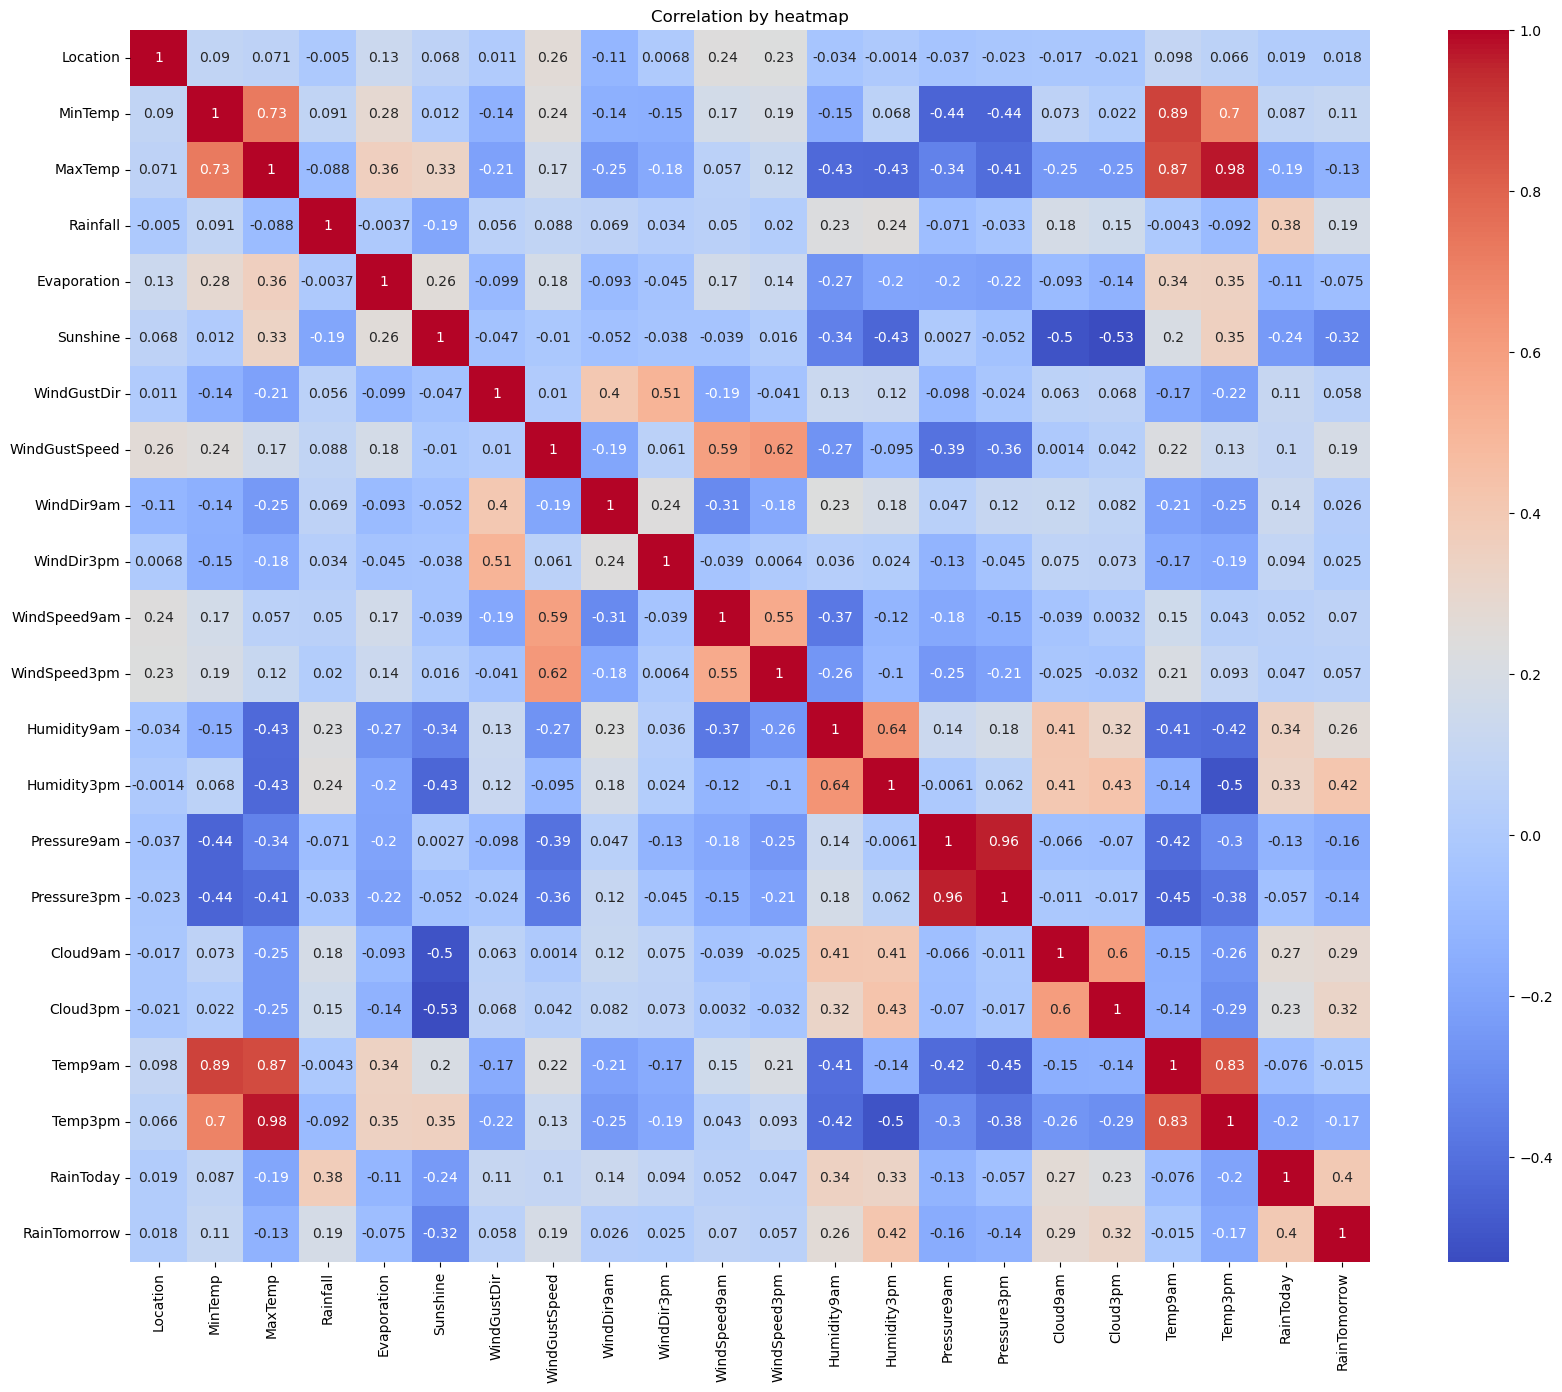

In [26]:
# let's also check corrrelation with the help of heatmap
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

We can see that we are not having too much correlated columns it is just temperature and pressure of different time which are correlated and as it's genuine and obvious let's keep them as it is.

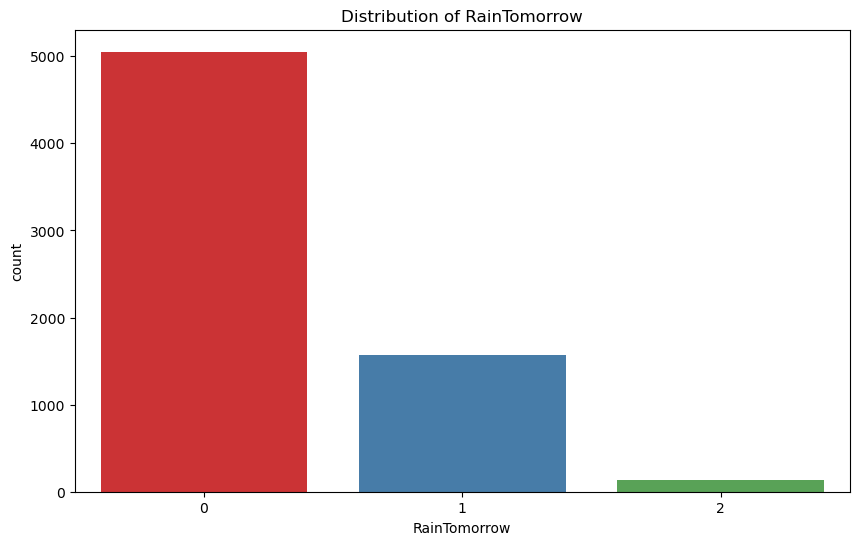

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RainTomorrow', data=df, palette='Set1')
plt.title('Distribution of RainTomorrow')
plt.show()

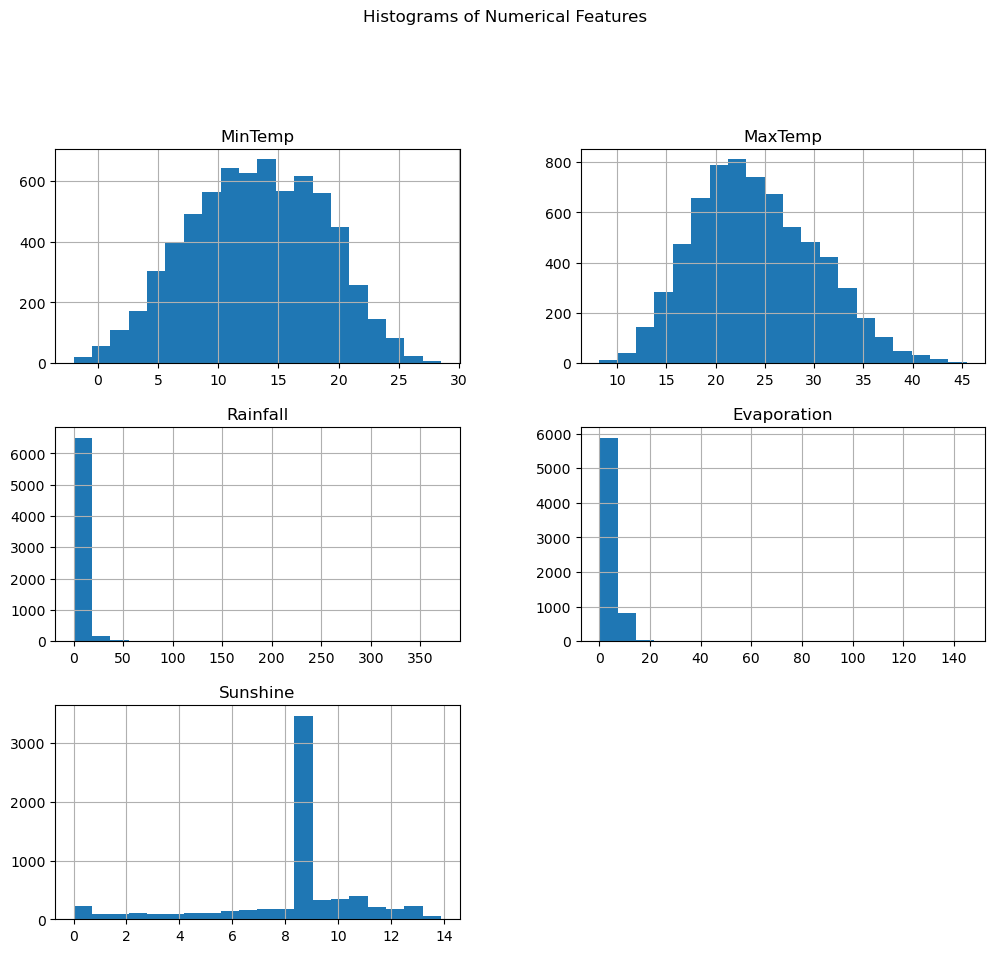

In [11]:
df_numerical = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']]
df_numerical.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

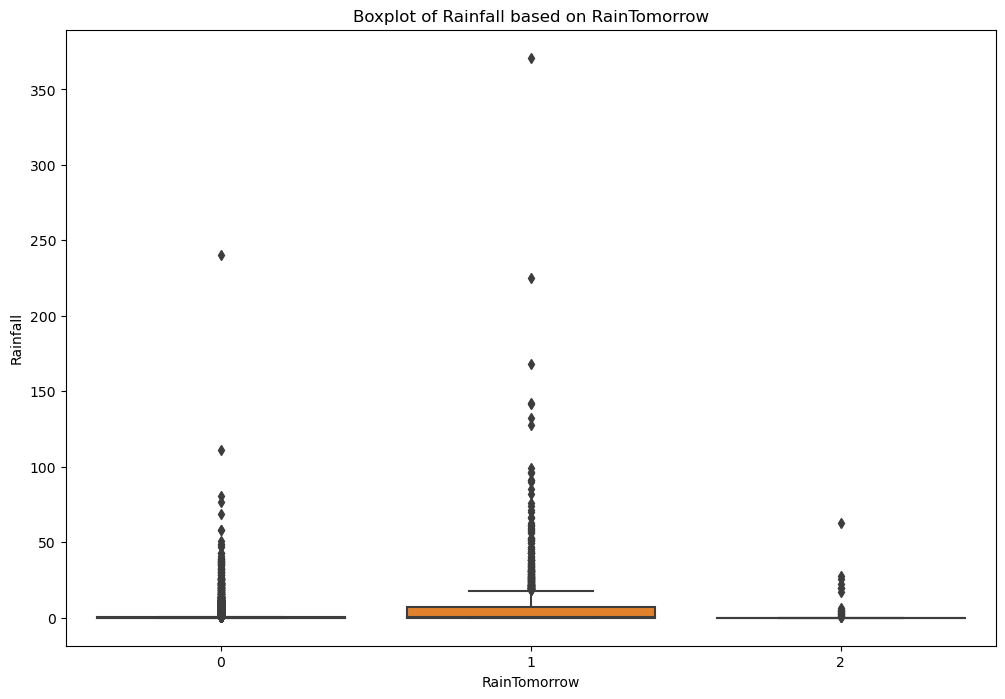

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title('Boxplot of Rainfall based on RainTomorrow')
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]),
 [Text(1, 0, 'Location'),
  Text(2, 0, 'MinTemp'),
  Text(3, 0, 'MaxTemp'),
  Text(4, 0, 'Rainfall'),
  Text(5, 0, 'Evaporation'),
  Text(6, 0, 'Sunshine'),
  Text(7, 0, 'WindGustDir'),
  Text(8, 0, 'WindGustSpeed'),
  Text(9, 0, 'WindDir9am'),
  Text(10, 0, 'WindDir3pm'),
  Text(11, 0, 'WindSpeed9am'),
  Text(12, 0, 'WindSpeed3pm'),
  Text(13, 0, 'Humidity9am'),
  Text(14, 0, 'Humidity3pm'),
  Text(15, 0, 'Pressure9am'),
  Text(16, 0, 'Pressure3pm'),
  Text(17, 0, 'Cloud9am'),
  Text(18, 0, 'Cloud3pm'),
  Text(19, 0, 'Temp9am'),
  Text(20, 0, 'Temp3pm'),
  Text(21, 0, 'RainToday'),
  Text(22, 0, 'RainTomorrow')])

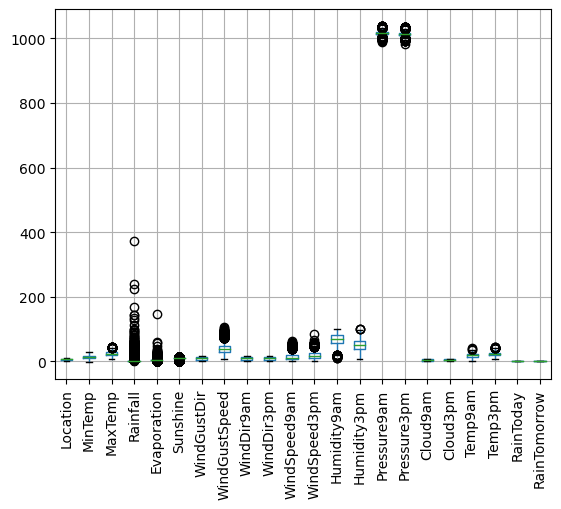

In [14]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks(rotation=90)

With the help of above boxplot we can see that we are having outliers in most of columns which we'll treat further.

In [17]:
#Let's find outlier with Zscore method
outliers=df[['Temp3pm','Temp9am','Humidity3pm','Humidity9am','WindGustSpeed','Evaporation','Rainfall','MaxTemp','MinTemp']]
z=np.abs(zscore(outliers))
z

,Temp3pm,Temp9am,Humidity3pm,Humidity9am,WindGustSpeed,Evaporation,Rainfall,MaxTemp,MinTemp
0,0.150291,0.173772,1.539417,0.203097,0.375256,0.11869,0.202435,0.194387,0.052141
1,0.268319,0.121343,1.377229,1.368362,0.375256,0.11869,0.259635,0.164497,1.030834
2,0.084131,0.542762,1.106916,1.717576,0.524783,0.11869,0.259635,0.262375,0.038106
3,0.636697,0.035945,1.863792,1.310160,1.120019,0.11869,0.259635,0.637572,0.705941
4,1.172518,0.016484,0.944728,0.843321,0.150965,0.11869,0.164301,1.339029,0.792175
...,...,...,...,...,...,...,...,...,...
8420,0.049825,1.362169,1.431291,0.960947,0.596672,0.11869,0.259635,0.112823,1.861116
8421,0.301808,1.222357,1.593479,0.669936,1.269546,0.11869,0.259635,0.197123,1.716719
8422,0.569719,0.942735,1.431291,0.844543,0.148090,0.11869,0.259635,0.458130,1.391826
8423,0.552974,0.488347,1.431291,0.960947,0.820964,0.11869,0.259635,0.474443,0.958636


In [18]:
np.where(z>3)

(array([   8,   44,   44,   52,   60,   60,   61,   61,   62,   62,   62,
          67,   68,   68,  123,  267,  381,  405,  406,  407,  431,  462,
         563,  699,  713,  770,  795,  796,  797,  802,  928,  935,  949,
         979,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1202,
        1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480,
        1481, 1513, 1661, 1673, 1680, 1774, 1819, 1873, 2108, 2116, 2201,
        2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676,
        2677, 2735, 2827, 2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877,
        2883, 2890, 2891, 2897, 2898, 2900, 2900, 2901, 2905, 2909, 2911,
        2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3003,
        3045, 3051, 3055, 3066, 3067, 3070, 3082, 3089, 3099, 3101, 3143,
        3150, 3157, 3157, 3164, 3172, 3178, 3185, 3192, 3206, 3213, 3221,
        3227, 3234, 3248, 3248, 3256, 3260, 3278, 3278, 3291, 3302, 3302,
        3350, 3419, 3421, 3430, 3449, 

Here we go- we've successfully detected outliers here let's removed them in next step

In [19]:
df1=df[(z<3).all(axis=1)]

And it's done we've successfully removed outliers from the data and it's ready to work with now.

In [20]:
df1.shape

(6526, 23)

we can see earlier we were having 6762 rows however after rwemoving outliers we are only having 6526 rows that means we have successfuly removed outliers without too much dataloss.

In [71]:
df1.skew()

Location         0.004414
MinTemp         -0.076774
MaxTemp          0.273036
Rainfall         3.532768
Evaporation      1.134944
Sunshine        -1.280796
WindGustDir     -0.207075
WindGustSpeed    0.511917
WindDir9am      -0.067967
WindDir3pm      -0.074228
WindSpeed9am     0.894349
WindSpeed3pm     0.512313
Humidity9am     -0.229390
Humidity3pm      0.157974
Pressure9am      0.055515
Pressure3pm      0.060634
Cloud9am        -0.413378
Cloud3pm        -0.385503
Temp9am         -0.068673
Temp3pm          0.299320
dtype: float64

We can see some of our columns are having skewness present in it, let's remove them to proceed further.

In [21]:
df1['Rainfall']=np.cbrt(df1['Rainfall'])
df1['Evaporation']=np.cbrt(df1['Evaporation'])
df1['RainToday']=np.cbrt(df1['RainToday'])
df1['RainTomorrow']=np.cbrt(df1['RainTomorrow'])

In [22]:
df1['Sunshine']=np.sqrt(df1['Sunshine'])

In [42]:
df1.skew()

Location         0.004414
MinTemp         -0.076774
MaxTemp          0.273036
Rainfall         1.506650
Evaporation     -0.647561
Sunshine        -2.430457
WindGustDir     -0.207075
WindGustSpeed    0.511917
WindDir9am      -0.067967
WindDir3pm      -0.074228
WindSpeed9am     0.894349
WindSpeed3pm     0.512313
Humidity9am     -0.229390
Humidity3pm      0.157974
Pressure9am      0.055515
Pressure3pm      0.060634
Cloud9am        -0.413378
Cloud3pm        -0.385503
Temp9am         -0.068673
Temp3pm          0.299320
RainToday        1.224950
RainTomorrow     1.217101
dtype: float64

We can see there is still a skewnees in sunshine, let's try to remove it via log method, as we've also tried it let's drop  sunshine.

In [23]:
df1.drop('Sunshine',inplace=True,axis=1)

In [24]:
# As now our data is ready to work let's divide it into dependent and target variable.
features = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow']
target = 'RainToday'

In [25]:
x = df1[features]
y = df1[target]

In [26]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (6526, 20)
dimension of dependent variable: (6526,)


We can see that we are having same number of rows that is 6526 and 20 columns in indpendent variable wich means we are going good and can perform tarining and prediction.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu= 0
mxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred=RFR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS = i
print("Max accuracy is :" , maxAccu, "at random_state:", maxRS)

Max accuracy is : 1.0 at random_state: 1


That's great we are getting 100 accuracy at random state 1

In [28]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = maxRS)

In [29]:
#let's import neccesarry libraries

from sklearn.metrics import classification_report, confusion_matrix,roc_curve, accuracy_score

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict (x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

1.0
[[1537    0]
 [   0  421]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1537
         1.0       1.00      1.00      1.00       421

    accuracy                           1.00      1958
   macro avg       1.00      1.00      1.00      1958
weighted avg       1.00      1.00      1.00      1958



In [31]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict (x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.9938712972420838
[[1530    7]
 [   5  416]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1537
         1.0       0.98      0.99      0.99       421

    accuracy                           0.99      1958
   macro avg       0.99      0.99      0.99      1958
weighted avg       0.99      0.99      0.99      1958



In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict (x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

1.0
[[1537    0]
 [   0  421]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1537
         1.0       1.00      1.00      1.00       421

    accuracy                           1.00      1958
   macro avg       1.00      1.00      1.00      1958
weighted avg       1.00      1.00      1.00      1958



In [33]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict (x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

1.0
[[1537    0]
 [   0  421]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1537
         1.0       1.00      1.00      1.00       421

    accuracy                           1.00      1958
   macro avg       1.00      1.00      1.00      1958
weighted avg       1.00      1.00      1.00      1958



In [34]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict (x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

1.0
[[1537    0]
 [   0  421]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1537
         1.0       1.00      1.00      1.00       421

    accuracy                           1.00      1958
   macro avg       1.00      1.00      1.00      1958
weighted avg       1.00      1.00      1.00      1958



In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predrfc)-score.mean()*100))

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is : -99.0


In [37]:
score = cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predetc)-score.mean()*100))

[0.99157734 0.9862069  0.98850575 0.99463602 0.98544061]
0.9892733214811684
Difference between Accuracy score and cross validation score is : -97.93346085087477


In [38]:
score = cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predgbc)-score.mean()*100))

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is : -99.0


In [39]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predabc)-score.mean()*100))

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is : -99.0


In [40]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predbc)-score.mean()*100))

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is : -99.0


We can see that all the models are working fine let's pick Bagging classifier as it is having least difference between actual and cross validation's accuracy

# Let's do Hyper parameter tunning by Randomizedsearch

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
parameters={'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'random_state': [42]}

In [46]:
RSCV=RandomizedSearchCV(BaggingClassifier(),parameters,cv=5)

In [47]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [0.5, 0.7, 0.9],
                                        'max_samples': [0.5, 0.7, 0.9],
                                        'n_estimators': [10, 50, 100],
                                        'random_state': [42]})

In [49]:
RSCV.best_params_

{'random_state': 42,
 'n_estimators': 50,
 'max_samples': 0.5,
 'max_features': 0.9,
 'bootstrap_features': True,
 'bootstrap': False}

In [50]:
Model=BaggingClassifier(random_state= 42, n_estimators= 50, max_samples= 0.5, max_features= 0.9,bootstrap_features= True,bootstrap= False)

In [52]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[1537    0]
 [   0  421]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1537
         1.0       1.00      1.00      1.00       421

    accuracy                           1.00      1958
   macro avg       1.00      1.00      1.00      1958
weighted avg       1.00      1.00      1.00      1958



In [ ]:
We can see that at the final stage ur model is giving accuracy score of 100 which can be considered as excellent accuracy score.

Now let's save our model by pickle method

In [53]:
import pickle
filename='Weather_forecasting.pkl'
pickle.dump(Model,open(filename,'wb'))

In [54]:
Load_model=pickle.load(open('Weather_forecasting.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

100.0


In [55]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [56]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957
Predicted,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
Original,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


# Thank you.